In [1]:
from apts import *
%matplotlib inline  

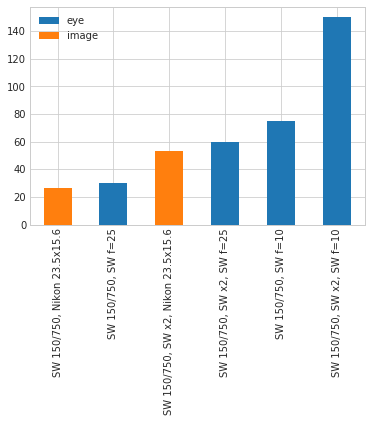

In [2]:
e = Equipment()

sky_watcher = "SW"
nikon = "Nikon"
t = equipment.Telescope(150, 750, sky_watcher, t2_output = True)
c = equipment.Camera(23.5, 15.6, 6000, 4000, nikon)

e.register(t)
e.register(c)
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))

e.plot_fov('zoom')

In [3]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,elements
0,"SW 150/750, SW f=25",eye,30.00000,True,1.733333,2
5,"SW 150/750, Nikon 23.5x15.6",image,26.58956,True,1.191840,2
2,"SW 150/750, SW x2, SW f=25",eye,60.00000,True,0.866667,3
1,"SW 150/750, SW f=10",eye,75.00000,True,0.693333,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",image,53.17912,True,0.595920,3
3,"SW 150/750, SW x2, SW f=10",eye,150.00000,True,0.346667,3


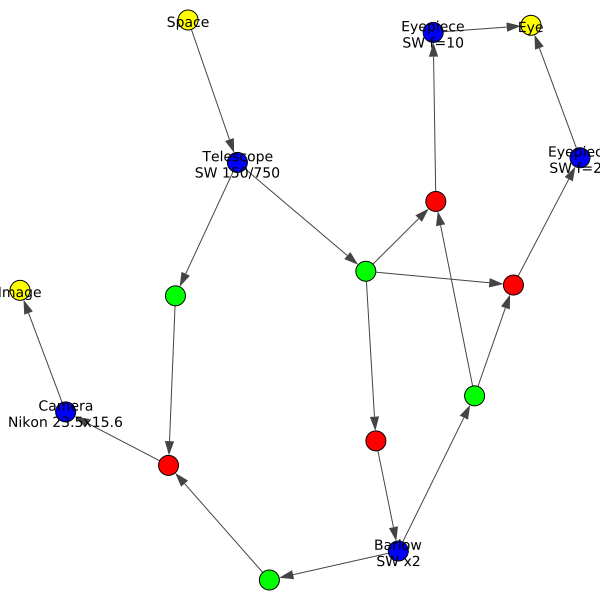

In [4]:
e.plot_connection_garph()


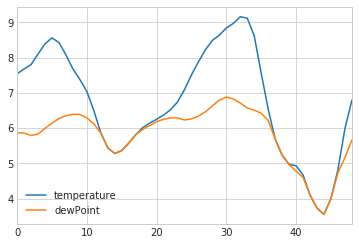

In [5]:
zelkow = Place(lat=50.1637973,lon=19.7855169)
zelkow.weather.data[["temperature","dewPoint"]].plot()

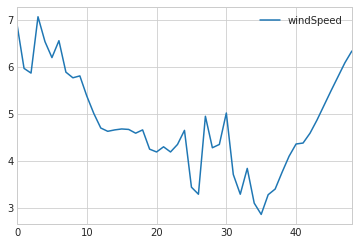

In [6]:
zelkow.weather.data[["windSpeed"]].plot()